# Comparison

This notebook is used to generate tables and figures for the Evaluation / Discussion sections of the paper.

In [1]:
%cd ..

/Users/maxschmaltz/Desktop/DEKOR


/Users/maxschmaltz/Desktop/DEKOR/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
paths = {
	"ngrams": "benchmarking/results/ngrams/final/",
	"ffn": "benchmarking/results/nns/ffn/final/",
	"rnn": "benchmarking/results/nns/rnn/final/",
	"gru": "benchmarking/results/nns/gru/final/",
	"cnn": "benchmarking/results/nns/cnn/final/",
	"gbert": "benchmarking/results/llms/gbert/final/",
	"byt5": "benchmarking/results/llms/byt5/final/",
	"llama-instruct-base": "benchmarking/results/llms/llama-instruct/base_english_0_shot",
	"llama-instruct+cand": "benchmarking/results/llms/llama-instruct/cand_english_0_shot",
	"llama-instruct+cand+par": "benchmarking/results/llms/llama-instruct/cand_par_english_0_shot"
}

In [3]:
def save_df(df, path):
	df.to_csv(
		path,
		sep='\t',
		index=True,
		header=True
	)

figures_dir = "benchmarking/figures/"

In [4]:
from dekor.utils.gecodb_parser import parse_gecodb
test_data = parse_gecodb("resources/datasets/test_500.tsv", version="df")
comp_types = test_data["comp_type"].values.tolist()
comp_type_counts = {
	comp_type: comp_types.count(comp_type)
	for comp_type in comp_types
}
comp_type_counts

{'common': 372,
 'infrequent': 129,
 'hapax_legomena': 33,
 'allomorphic_fc': 17,
 'invented': 47}

## Average Metrics

In [5]:
import os
import json
import pandas as pd

from dekor.utils.gecodb_parser import Compound

In [9]:
link_metrics_data_avg = {
	key: pd.read_csv(
		os.path.join(path, "link_metrics.tsv"),
		sep="\t",
		index_col=0,
		names=[key]
	).T.to_dict(orient="records")[0]
	for key, path in paths.items()
}

link_metrics_avg = pd.DataFrame(link_metrics_data_avg).T
save_df(link_metrics_avg, os.path.join(figures_dir, "avg",  "link_metrics.tsv"))
link_metrics_avg

,precision,recall,f1,accuracy
ngrams,0.776740,0.399873,0.498373,0.786802
ffn,0.044730,0.063735,0.050464,0.460237
rnn,0.068299,0.106810,0.065199,0.248731
gru,0.086205,0.176533,0.075961,0.152284
cnn,0.047592,0.167612,0.056404,0.360406
gbert,0.169217,0.146122,0.155191,0.592217
byt5,0.667567,0.414392,0.498714,0.744501
llama-instruct-base,0.936894,0.583969,0.683680,0.868020
llama-instruct+cand,0.932818,0.618961,0.719981,0.854484
llama-instruct+cand+par,0.950776,0.678986,0.772057,0.854484


In [10]:
type_metrics_data_avg = {
	key: pd.read_csv(
		os.path.join(path, "type_metrics.tsv"),
		sep="\t",
		index_col=0,
		names=[key]
	).T.to_dict(orient="records")[0]
	for key, path in paths.items()
}

type_metrics_avg = pd.DataFrame(type_metrics_data_avg).T
save_df(link_metrics_avg, os.path.join(figures_dir, "avg", "type_metrics.tsv"))
type_metrics_avg

,precision,recall,f1,accuracy
ngrams,0.593464,0.389683,0.448367,0.791878
ffn,0.146973,0.154346,0.141262,0.514382
rnn,0.243992,0.220252,0.222188,0.507614
gru,0.223348,0.258893,0.223097,0.414552
cnn,0.181714,0.406811,0.197952,0.424704
gbert,0.289461,0.212299,0.243529,0.609137
byt5,0.626465,0.470296,0.532743,0.746193
llama-instruct-base,0.963412,0.729510,0.823071,0.879865
llama-instruct+cand,0.918010,0.646722,0.737606,0.856176
llama-instruct+cand+par,0.938439,0.693927,0.792035,0.856176


In [12]:
placements_data_avg = {
	key: pd.read_csv(
		os.path.join(path, "placement.tsv"),
		sep="\t",
		index_col=0,
		names=[key]
	).T.to_dict(orient="records")[0]
	for key, path in paths.items()
}

placements_avg = pd.DataFrame(placements_data_avg).T
save_df(placements_avg, os.path.join(figures_dir, "avg", "placements.tsv"))
placements_avg

,_,_+=e_,_+=er_,_+e_,_+er_,_+n_,_+ns_,_+s_,_-e_
ngrams,0.713287,1.0,1.000000,1.0,1.0,0.803279,1.0,1.000,0.000000
ffn,0.007634,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000,0.000000
rnn,0.170213,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000,0.000000
gru,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000,0.000000
cnn,0.010526,0.0,0.142857,0.0,0.0,0.000000,0.0,0.125,0.000000
gbert,0.909091,0.0,0.000000,0.0,0.0,0.862069,0.0,1.000,0.000000
byt5,0.963696,0.0,0.000000,1.0,1.0,0.960000,1.0,1.000,0.875000
llama-instruct-base,0.996633,1.0,1.000000,1.0,1.0,0.970149,1.0,1.000,0.857143
llama-instruct+cand,0.971530,1.0,1.000000,1.0,1.0,0.971014,1.0,1.000,0.875000
llama-instruct+cand+par,0.992958,1.0,1.000000,1.0,1.0,0.971014,1.0,1.000,1.000000


## Metrics by FC Classes

In [13]:
link_metrics = {}
type_metrics = {}
placements = {}
placements_perc_data = {}
failures_data = {}

for fc_class in ["common", "infrequent", "hapax_legomena", "allomorphic_fc", "invented"]:

	link_metrics_data = {
		key: pd.read_csv(
			os.path.join(path, fc_class, "link_metrics.tsv"),
			sep="\t",
			index_col=0,
			names=[key]
		).T.to_dict(orient="records")[0]
		for key, path in paths.items()
	}

	link_metrics[fc_class] = pd.DataFrame(link_metrics_data).T

	type_metrics_data = {
		key: pd.read_csv(
			os.path.join(path, fc_class, "type_metrics.tsv"),
			sep="\t",
			index_col=0,
			names=[key]
		).T.to_dict(orient="records")[0]
		for key, path in paths.items()
	}

	type_metrics[fc_class] = pd.DataFrame(type_metrics_data).T

	placement_data = {
		key: pd.read_csv(
			os.path.join(path, fc_class, "placement.tsv"),
			sep="\t",
			index_col=0,
			names=[key]
		).T.to_dict(orient="records")[0]
		for key, path in paths.items()
	}

	placements[fc_class] = pd.DataFrame(placement_data).T

	failures_data[fc_class] = {
		key: pd.read_csv(
			os.path.join(path, fc_class, "link_confmat.tsv"),
			sep="\t",
			index_col=0
		).get("none", pd.Series(0)).sum()
		for key, path in paths.items()
	}

	placements_perc_data[fc_class] = {
		key: pd.read_csv(
			os.path.join(path, fc_class, "df.tsv"),
			sep="\t",
			index_col=0
		)["is_correct"].sum()
		for key, path in paths.items()
	}

### Common

In [14]:
save_df(link_metrics["common"], os.path.join(figures_dir, "common", "link_metrics.tsv"))
link_metrics["common"]

,precision,recall,f1,accuracy
ngrams,0.338694,0.214605,0.249526,0.829268
ffn,0.030695,0.033700,0.030913,0.482385
rnn,0.051295,0.163185,0.054913,0.257453
gru,0.063273,0.205905,0.059114,0.154472
cnn,0.035973,0.176398,0.041612,0.395664
gbert,0.123520,0.102504,0.110844,0.655827
byt5,0.703646,0.455648,0.535272,0.796748
llama-instruct-base,0.996740,0.761933,0.842582,0.924119
llama-instruct+cand,0.972852,0.745477,0.803630,0.907859
llama-instruct+cand+par,0.965602,0.859599,0.902659,0.907859


In [17]:
save_df(type_metrics["common"], os.path.join(figures_dir, "common", "type_metrics.tsv"))
type_metrics["common"]

,precision,recall,f1,accuracy
ngrams,0.558680,0.270828,0.313937,0.834688
ffn,0.116044,0.119162,0.112803,0.531165
rnn,0.194887,0.198396,0.189178,0.512195
gru,0.183472,0.232405,0.187716,0.406504
cnn,0.144002,0.434968,0.158206,0.441734
gbert,0.240476,0.183181,0.206168,0.669377
byt5,0.660366,0.399290,0.489463,0.796748
llama-instruct-base,0.996082,0.824870,0.900458,0.929539
llama-instruct+cand,0.915557,0.810884,0.830217,0.907859
llama-instruct+cand+par,0.892224,0.820030,0.853306,0.907859


In [18]:
save_df(placements["common"], os.path.join(figures_dir, "common", "placements.tsv"))
placements["common"]

,_,_+=e_,_+=er_,_+e_,_+er_,_+n_,_+ns_,_+s_,_-e_
ngrams,0.733333,1.0,0.0,1.0,0.0,0.871795,0.0,1.000000,0.0
ffn,0.011765,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
rnn,0.195652,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
gru,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
cnn,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.083333,0.0
gbert,0.946154,0.0,0.0,0.0,0.0,0.875000,0.0,1.000000,0.0
byt5,0.980769,0.0,0.0,1.0,1.0,1.000000,1.0,1.000000,1.0
llama-instruct-base,1.000000,1.0,1.0,1.0,1.0,0.975610,1.0,1.000000,1.0
llama-instruct+cand,0.989796,1.0,1.0,1.0,1.0,0.953488,1.0,1.000000,1.0
llama-instruct+cand+par,1.000000,1.0,1.0,1.0,1.0,0.953488,1.0,1.000000,1.0


### Infrequent

In [19]:
save_df(link_metrics["infrequent"], os.path.join(figures_dir, "infrequent", "link_metrics.tsv"))
link_metrics["infrequent"]

,precision,recall,f1,accuracy
ngrams,0.770799,0.668923,0.708031,0.880952
ffn,0.069671,0.085043,0.075478,0.476190
rnn,0.076379,0.110398,0.071864,0.238095
gru,0.027090,0.146364,0.021266,0.126984
cnn,0.044049,0.168966,0.054789,0.341270
gbert,0.145288,0.143972,0.141539,0.555556
byt5,0.576701,0.355975,0.417691,0.603175
llama-instruct-base,0.507600,0.375862,0.414772,0.817460
llama-instruct+cand,0.667793,0.470312,0.522726,0.793651
llama-instruct+cand+par,0.583251,0.467182,0.501111,0.793651


In [23]:
save_df(type_metrics["infrequent"], os.path.join(figures_dir, "infrequent", "type_metrics.tsv"))
type_metrics["infrequent"]

,precision,recall,f1,accuracy
ngrams,0.549054,0.506570,0.525498,0.880952
ffn,0.114328,0.130735,0.108444,0.500000
rnn,0.248831,0.205584,0.211420,0.492063
gru,0.171505,0.178439,0.157801,0.380952
cnn,0.167188,0.346540,0.184174,0.396825
gbert,0.249717,0.189210,0.211622,0.579365
byt5,0.692573,0.578619,0.609493,0.603175
llama-instruct-base,0.910093,0.531498,0.642045,0.841270
llama-instruct+cand,0.838769,0.563501,0.611692,0.793651
llama-instruct+cand+par,0.571639,0.382217,0.449918,0.793651


In [24]:
save_df(placements["infrequent"], os.path.join(figures_dir, "infrequent", "placements.tsv"))
placements["infrequent"]

,_,_+=e_,_+=er_,_+e_,_+er_,_+n_,_+ns_,_+s_,_-e_
ngrams,0.786885,1.0,1.0,1.0,1.0,0.769231,1.0,1.000000,0.0
ffn,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
rnn,0.107143,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
gru,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
cnn,0.027027,0.0,0.0,0.0,0.0,0.000000,0.0,0.333333,0.0
gbert,0.806452,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0
byt5,0.983051,0.0,0.0,1.0,1.0,1.000000,0.0,1.000000,1.0
llama-instruct-base,1.000000,0.0,1.0,1.0,0.0,1.000000,0.0,1.000000,1.0
llama-instruct+cand,0.947368,0.0,1.0,1.0,0.0,1.000000,1.0,1.000000,1.0
llama-instruct+cand+par,0.983051,0.0,1.0,1.0,0.0,1.000000,1.0,1.000000,0.0


### Hapax Legomena

In [25]:
save_df(link_metrics["hapax_legomena"], os.path.join(figures_dir, "hapax_legomena", "link_metrics.tsv"))
link_metrics["hapax_legomena"]

,precision,recall,f1,accuracy
ngrams,0.486644,0.379775,0.384197,0.65625
ffn,0.033176,0.053082,0.040832,0.37500
rnn,0.037323,0.039811,0.038527,0.28125
gru,NaN,NaN,NaN,0.21875
cnn,NaN,NaN,NaN,0.37500
gbert,0.208527,0.216426,0.205511,0.34375
byt5,0.360980,0.215167,0.253458,0.56250
llama-instruct-base,0.217239,0.214843,0.214181,0.50000
llama-instruct+cand,0.434431,0.302994,0.350274,0.56250
llama-instruct+cand+par,0.401202,0.314681,0.341219,0.53125


In [28]:
save_df(type_metrics["hapax_legomena"], os.path.join(figures_dir, "hapax_legomena", "type_metrics.tsv"))
type_metrics["hapax_legomena"]

,precision,recall,f1,accuracy
ngrams,0.231484,0.237034,0.229478,0.68750
ffn,0.185934,0.184962,0.171133,0.53125
rnn,0.192296,0.192430,0.192163,0.56250
gru,NaN,NaN,NaN,0.50000
cnn,NaN,NaN,NaN,0.53125
gbert,0.264971,0.137596,0.180787,0.40625
byt5,0.275193,0.207264,0.208038,0.59375
llama-instruct-base,0.297554,0.193351,0.233422,0.56250
llama-instruct+cand,0.295105,0.204502,0.236012,0.59375
llama-instruct+cand+par,0.284460,0.192430,0.229552,0.56250


In [29]:
save_df(placements["hapax_legomena"], os.path.join(figures_dir, "hapax_legomena", "placements.tsv"))
placements["hapax_legomena"]

,_,_+e_,_+er_,_+n_,_+ns_,_+s_,_-e_,_+=e_,_+=er_
ngrams,0.384615,0.0,1.0,0.666667,1.0,1.0,0.0,NaN,NaN
ffn,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,NaN
rnn,0.111111,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,NaN
gru,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN
cnn,0.083333,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,0.0
gbert,0.600000,0.0,0.0,1.000000,0.0,1.0,0.0,NaN,NaN
byt5,0.642857,0.0,1.0,1.000000,0.0,1.0,0.0,NaN,NaN
llama-instruct-base,0.900000,0.0,0.0,1.000000,0.0,1.0,0.0,NaN,NaN
llama-instruct+cand,0.818182,0.0,0.0,1.000000,1.0,1.0,0.0,NaN,NaN
llama-instruct+cand+par,0.888889,0.0,0.0,1.000000,1.0,1.0,0.0,NaN,NaN


### Allomorfic FC

In [34]:
save_df(link_metrics["allomorphic_fc"], os.path.join(figures_dir, "allomorphic_fc", "link_metrics.tsv"))
link_metrics["allomorphic_fc"]

,precision,recall,f1,accuracy
ngrams,0.080536,0.084563,0.064716,0.411765
ffn,0.016107,0.048322,0.024161,0.235294
rnn,0.039651,0.192378,0.060584,0.235294
gru,0.186338,0.168217,0.173395,0.117647
cnn,0.016107,0.024161,0.019036,0.117647
gbert,0.080536,0.072482,0.075655,0.352941
byt5,0.687726,0.687726,0.687726,0.882353
llama-instruct-base,0.831783,0.831783,0.831783,0.882353
llama-instruct+cand,0.833796,0.843863,0.838372,0.941176
llama-instruct+cand+par,0.843863,0.843863,0.843863,0.941176


In [35]:
save_df(type_metrics["allomorphic_fc"], os.path.join(figures_dir, "allomorphic_fc", "type_metrics.tsv"))
type_metrics["allomorphic_fc"]

,precision,recall,f1,accuracy
ngrams,0.319866,0.340258,0.221741,0.411765
ffn,0.078939,0.236816,0.118408,0.235294
rnn,0.236919,0.288208,0.249750,0.470588
gru,0.772993,0.499671,0.572330,0.647059
cnn,0.586120,0.344836,0.416626,0.235294
gbert,0.319866,0.206885,0.234039,0.352941
byt5,0.517212,0.517212,0.517212,0.882353
llama-instruct-base,0.940796,0.918677,0.929154,0.882353
llama-instruct+cand,0.950663,0.758606,0.812160,0.941176
llama-instruct+cand+par,1.000000,0.977881,0.988358,0.941176


In [36]:
save_df(placements["allomorphic_fc"], os.path.join(figures_dir, "allomorphic_fc", "placements.tsv"))
placements["allomorphic_fc"]

,_,_+=e_,_+=er_,_+e_,_+er_,_+n_,_+ns_,_+s_
ngrams,0.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ffn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rnn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cnn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gbert,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
byt5,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
llama-instruct-base,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
llama-instruct+cand,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
llama-instruct+cand+par,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


### Invented Compounds

In [37]:
save_df(link_metrics["invented"], os.path.join(figures_dir, "invented", "link_metrics.tsv"))
link_metrics["invented"]

,precision,recall,f1,accuracy
ngrams,0.303887,0.125098,0.159665,0.425532
ffn,0.044330,0.079630,0.056877,0.382979
rnn,0.028512,0.027087,0.027781,0.191489
gru,NaN,NaN,NaN,0.170213
cnn,0.062394,0.291473,0.091893,0.212766
gbert,0.207089,0.162892,0.182218,0.446809
byt5,0.571611,0.648286,0.583791,0.787234
llama-instruct-base,0.996238,0.871087,0.905383,0.808511
llama-instruct+cand,0.859208,0.913649,0.853435,0.765957
llama-instruct+cand+par,0.989378,0.891202,0.933782,0.787234


In [38]:
save_df(type_metrics["invented"], os.path.join(figures_dir, "invented", "type_metrics.tsv"))
type_metrics["invented"]

,precision,recall,f1,accuracy
ngrams,0.142555,0.115456,0.116959,0.425532
ffn,0.123906,0.140394,0.123323,0.510638
rnn,0.118372,0.129365,0.123124,0.489362
gru,0.277399,0.637929,0.367585,0.425532
cnn,0.171311,0.624020,0.226106,0.361702
gbert,0.169792,0.117961,0.138791,0.446809
byt5,0.397365,0.365726,0.380235,0.787234
llama-instruct-base,0.992429,0.896387,0.938467,0.808511
llama-instruct+cand,0.977348,0.831620,0.882639,0.765957
llama-instruct+cand+par,0.978623,0.890330,0.929191,0.787234


In [40]:
save_df(placements["invented"], os.path.join(figures_dir, "invented", "placements.tsv"))
placements["invented"]

,_,_+=er_,_+e_,_+er_,_+n_,_+s_,_-e_,_+ns_
ngrams,0.333333,0.0,1.0,0.0,0.500000,1.0,0.000000,NaN
ffn,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN
rnn,0.222222,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN
gru,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
cnn,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,NaN
gbert,0.875000,0.0,0.0,0.0,0.600000,1.0,0.000000,NaN
byt5,0.941176,0.0,1.0,1.0,0.777778,1.0,0.666667,NaN
llama-instruct-base,1.000000,1.0,1.0,1.0,0.923077,1.0,0.666667,NaN
llama-instruct+cand,0.916667,1.0,1.0,1.0,1.000000,1.0,0.500000,NaN
llama-instruct+cand+par,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,NaN


## F1's, Accuracies, and Placements by FC Classes

In [43]:
link_f1s_data = {
	key: metrics["f1"].to_dict()
	for key, metrics in link_metrics.items()
}

link_f1s = pd.DataFrame(link_f1s_data)
save_df(link_f1s, os.path.join(figures_dir, "link_f1s.tsv"))
link_f1s

,common,infrequent,hapax_legomena,allomorphic_fc,invented
ngrams,0.249526,0.708031,0.384197,0.064716,0.159665
ffn,0.030913,0.075478,0.040832,0.024161,0.056877
rnn,0.054913,0.071864,0.038527,0.060584,0.027781
gru,0.059114,0.021266,NaN,0.173395,NaN
cnn,0.041612,0.054789,NaN,0.019036,0.091893
gbert,0.110844,0.141539,0.205511,0.075655,0.182218
byt5,0.535272,0.417691,0.253458,0.687726,0.583791
llama-instruct-base,0.842582,0.414772,0.214181,0.831783,0.905383
llama-instruct+cand,0.803630,0.522726,0.350274,0.838372,0.853435
llama-instruct+cand+par,0.902659,0.501111,0.341219,0.843863,0.933782


In [44]:
type_f1s_data = {
	key: metrics["f1"].to_dict()
	for key, metrics in type_metrics.items()
}

type_f1s = pd.DataFrame(type_f1s_data)
save_df(type_f1s, os.path.join(figures_dir, "type_f1s.tsv"))
type_f1s

,common,infrequent,hapax_legomena,allomorphic_fc,invented
ngrams,0.313937,0.525498,0.229478,0.221741,0.116959
ffn,0.112803,0.108444,0.171133,0.118408,0.123323
rnn,0.189178,0.211420,0.192163,0.249750,0.123124
gru,0.187716,0.157801,NaN,0.572330,0.367585
cnn,0.158206,0.184174,NaN,0.416626,0.226106
gbert,0.206168,0.211622,0.180787,0.234039,0.138791
byt5,0.489463,0.609493,0.208038,0.517212,0.380235
llama-instruct-base,0.900458,0.642045,0.233422,0.929154,0.938467
llama-instruct+cand,0.830217,0.611692,0.236012,0.812160,0.882639
llama-instruct+cand+par,0.853306,0.449918,0.229552,0.988358,0.929191


In [45]:
link_accuracies_data = {
	key: metrics["accuracy"].to_dict()
	for key, metrics in link_metrics.items()
}

link_accuracies = pd.DataFrame(link_accuracies_data)
save_df(link_accuracies, os.path.join(figures_dir, "link_accuracies.tsv"))
link_accuracies

,common,infrequent,hapax_legomena,allomorphic_fc,invented
ngrams,0.829268,0.880952,0.65625,0.411765,0.425532
ffn,0.482385,0.476190,0.37500,0.235294,0.382979
rnn,0.257453,0.238095,0.28125,0.235294,0.191489
gru,0.154472,0.126984,0.21875,0.117647,0.170213
cnn,0.395664,0.341270,0.37500,0.117647,0.212766
gbert,0.655827,0.555556,0.34375,0.352941,0.446809
byt5,0.796748,0.603175,0.56250,0.882353,0.787234
llama-instruct-base,0.924119,0.817460,0.50000,0.882353,0.808511
llama-instruct+cand,0.907859,0.793651,0.56250,0.941176,0.765957
llama-instruct+cand+par,0.907859,0.793651,0.53125,0.941176,0.787234


In [46]:
type_accuracies_data = {
	key: metrics["accuracy"].to_dict()
	for key, metrics in type_metrics.items()
}

type_accuracies = pd.DataFrame(type_accuracies_data)
save_df(type_accuracies, os.path.join(figures_dir, "type_accuracies.tsv"))
type_accuracies

,common,infrequent,hapax_legomena,allomorphic_fc,invented
ngrams,0.834688,0.880952,0.68750,0.411765,0.425532
ffn,0.531165,0.500000,0.53125,0.235294,0.510638
rnn,0.512195,0.492063,0.56250,0.470588,0.489362
gru,0.406504,0.380952,0.50000,0.647059,0.425532
cnn,0.441734,0.396825,0.53125,0.235294,0.361702
gbert,0.669377,0.579365,0.40625,0.352941,0.446809
byt5,0.796748,0.603175,0.59375,0.882353,0.787234
llama-instruct-base,0.929539,0.841270,0.56250,0.882353,0.808511
llama-instruct+cand,0.907859,0.793651,0.59375,0.941176,0.765957
llama-instruct+cand+par,0.907859,0.793651,0.56250,0.941176,0.787234


In [47]:
placements_perc = pd.DataFrame(placements_perc_data)
for key, count in comp_type_counts.items():
	placements_perc[key] /= count

save_df(placements_perc, os.path.join(figures_dir, "placements_perc.tsv"))
placements_perc

,common,infrequent,hapax_legomena,allomorphic_fc,invented
ngrams,0.669355,0.736434,0.363636,0.352941,0.191489
ffn,0.005376,0.000000,0.000000,0.000000,0.000000
rnn,0.048387,0.023256,0.030303,0.000000,0.042553
gru,0.000000,0.000000,0.000000,0.000000,0.000000
cnn,0.002688,0.015504,0.030303,0.000000,0.021277
gbert,0.620968,0.496124,0.272727,0.352941,0.340426
byt5,0.779570,0.581395,0.393939,0.882353,0.702128
llama-instruct-base,0.913978,0.798450,0.454545,0.882353,0.765957
llama-instruct+cand,0.889785,0.751938,0.484848,0.941176,0.723404
llama-instruct+cand+par,0.895161,0.767442,0.484848,0.941176,0.787234


## F1's by Links

In [48]:
classification_data = {}
for link in placements_avg.columns:
	classification_data[link] = {
		key: pd.read_csv(
			os.path.join(path, "link_classification_report.tsv"),
			sep="\t",
			index_col=0
		)[link].loc["f1"]
		for key, path in paths.items()
	}
	
classification_f1s = pd.DataFrame(classification_data)
save_df(classification_f1s, os.path.join(figures_dir, "classification_f1s.tsv"))
classification_f1s

,_,_+=e_,_+=er_,_+e_,_+er_,_+n_,_+ns_,_+s_,_-e_
ngrams,0.827786,0.727273,0.400000,0.400000,0.285714,0.792208,0.615385,0.860759,0.000000
ffn,0.650932,0.000000,0.000000,0.078431,0.000000,0.000000,0.000000,0.084211,0.000000
rnn,0.510870,0.000000,0.235294,0.000000,0.022222,0.000000,0.000000,0.000000,0.000000
gru,0.328421,0.000000,0.352941,0.000000,0.000000,0.000000,0.034398,0.027397,0.000000
cnn,0.572289,0.000000,0.116667,0.000000,0.000000,0.000000,0.000000,0.119850,0.000000
gbert,0.666667,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.906250,0.000000
byt5,0.948357,0.000000,0.000000,0.695652,0.800000,0.775194,0.500000,0.645161,0.761905
llama-instruct-base,0.931034,0.545455,1.000000,0.545455,0.533333,0.917808,0.363636,0.948207,0.736842
llama-instruct+cand,0.900641,0.444444,0.666667,0.695652,0.555556,0.932432,0.941176,0.975610,0.727273
llama-instruct+cand+par,0.904459,0.600000,1.000000,0.695652,0.500000,0.932432,0.941176,0.954357,0.631579


## Failures

In [41]:
failures = pd.DataFrame(failures_data)
total = failures.sum(axis=1)
for key, count in comp_type_counts.items():
	failures[key] /= count
failures["total"] = total

save_df(failures, os.path.join(figures_dir, "failures.tsv"))
failures

,common,infrequent,hapax_legomena,allomorphic_fc,invented,total
ngrams,0.032258,0.007752,0.000000,0.000000,0.148936,20
ffn,0.000000,0.000000,0.000000,0.000000,0.000000,0
rnn,0.000000,0.000000,0.000000,0.000000,0.000000,0
gru,0.000000,0.000000,0.000000,0.000000,0.000000,0
cnn,0.000000,0.000000,0.000000,0.000000,0.000000,0
gbert,0.290323,0.333333,0.484848,0.411765,0.361702,191
byt5,0.196237,0.379845,0.181818,0.117647,0.148936,137
llama-instruct-base,0.053763,0.093023,0.363636,0.058824,0.170213,53
llama-instruct+cand,0.077957,0.124031,0.303030,0.000000,0.170213,63
llama-instruct+cand+par,0.064516,0.162791,0.333333,0.058824,0.148936,64


## Regenerations

In [49]:
regenerations_data = {}

for llm, path in {
	"llama-instruct-base": "benchmarking/results/llms/llama-instruct/base_english_0_shot",
	"llama-instruct+cand": "benchmarking/results/llms/llama-instruct/cand_english_0_shot",
	"llama-instruct+cand+par": "benchmarking/results/llms/llama-instruct/cand_par_english_0_shot"
}.items():
	
	df = pd.read_csv(
		os.path.join(path, "df.tsv"),
		sep="\t",
		index_col=0
	)
	df["lemmas"] = [Compound(raw).lemma for raw in df.index]
	correct_preds = df[df["is_correct"]]["lemmas"].values.tolist()
	n_cor = len(correct_preds)

	with open(os.path.join(path, "messages.json"), encoding="utf-8") as f:
		messages = json.load(f)

	correct_messages = {
		key: value for key, value in messages.items()
		if key in correct_preds
	}

	n_regenerations = [
		len([
			m for m in message
			if "Your colleague had the following task" in  m["content"]
		])
		for message in correct_messages.values()
	]
	n_regenerations = {
		n: n_regenerations.count(n)
		for n in set(n_regenerations)
		if n
	}
	regenerations_data[llm] = n_regenerations

regenerations = pd.DataFrame(regenerations_data).T
save_df(regenerations, os.path.join(figures_dir, "regenerations.tsv"))
regenerations

,1,2
llama-instruct-base,24,3
llama-instruct+cand,87,9
llama-instruct+cand+par,95,30


## NN Loss Plots

In [87]:
from PIL import Image
import matplotlib.pyplot as plt
plt.style.use("ggplot")

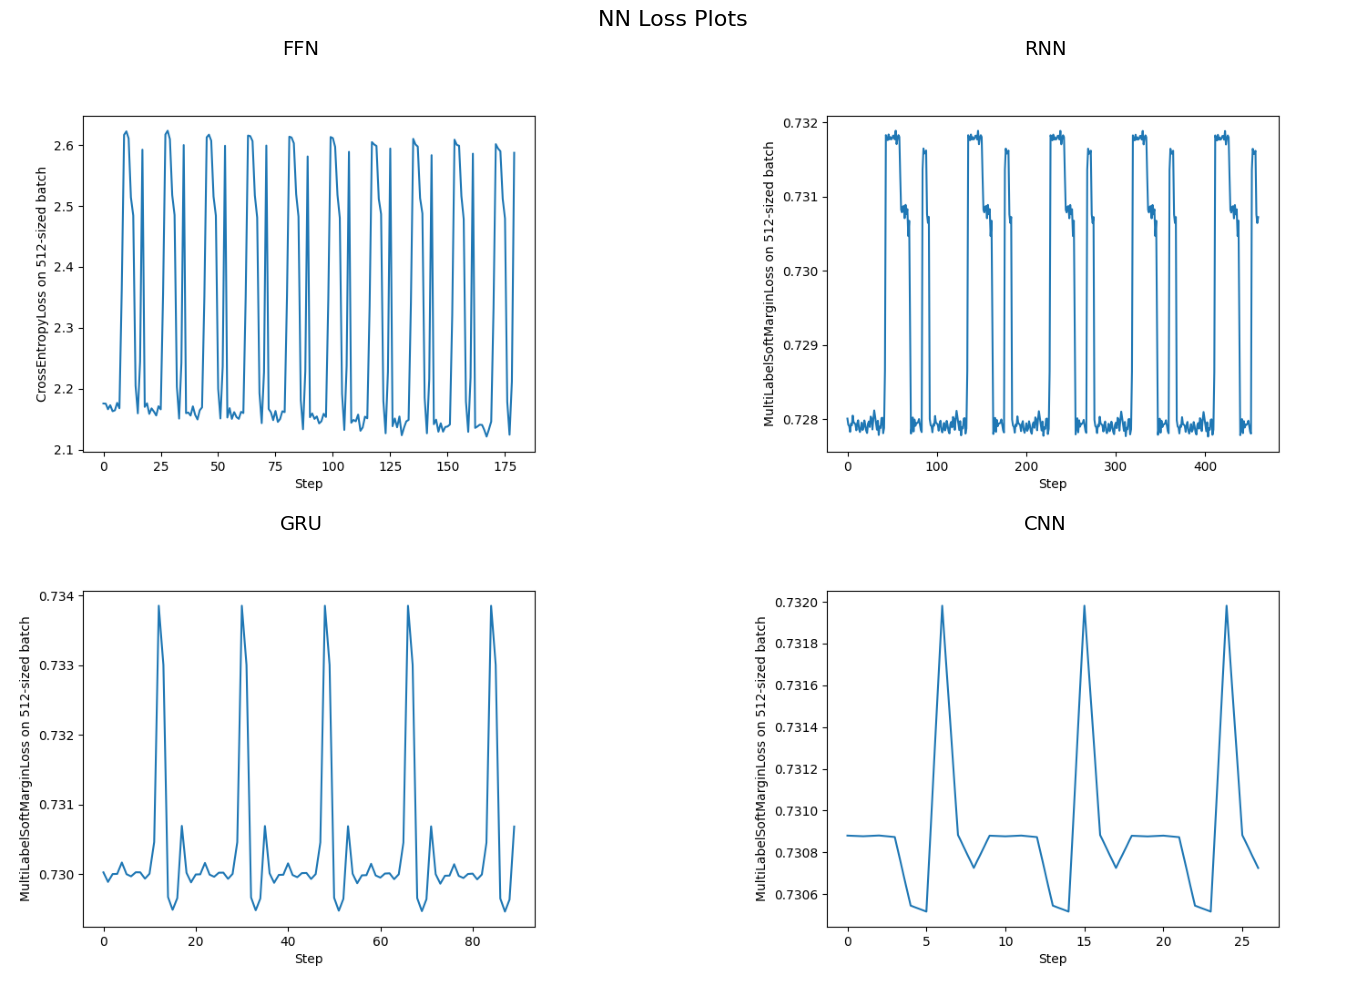

In [88]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

fig.suptitle("NN Loss Plots", fontsize=16)

images = [
    (
        Image.open(os.path.join(paths[nn], "plot.png")),
        nn.upper()
	)
    for nn in ["ffn", "rnn", "gru", "cnn"]
]

for i, ax in enumerate(axs.ravel()):
    image, caption = images[i]
    ax.imshow(image)
    ax.set_title(caption, fontsize=14)
    ax.axis("off")

# adjust layout so titles do not overlap
plt.tight_layout()
# plt.subplots_adjust(hspace=-0.06)

plt.savefig(os.path.join(figures_dir, "nn_loss_plots.png"), dpi=1200)
plt.show()

In [64]:
import json

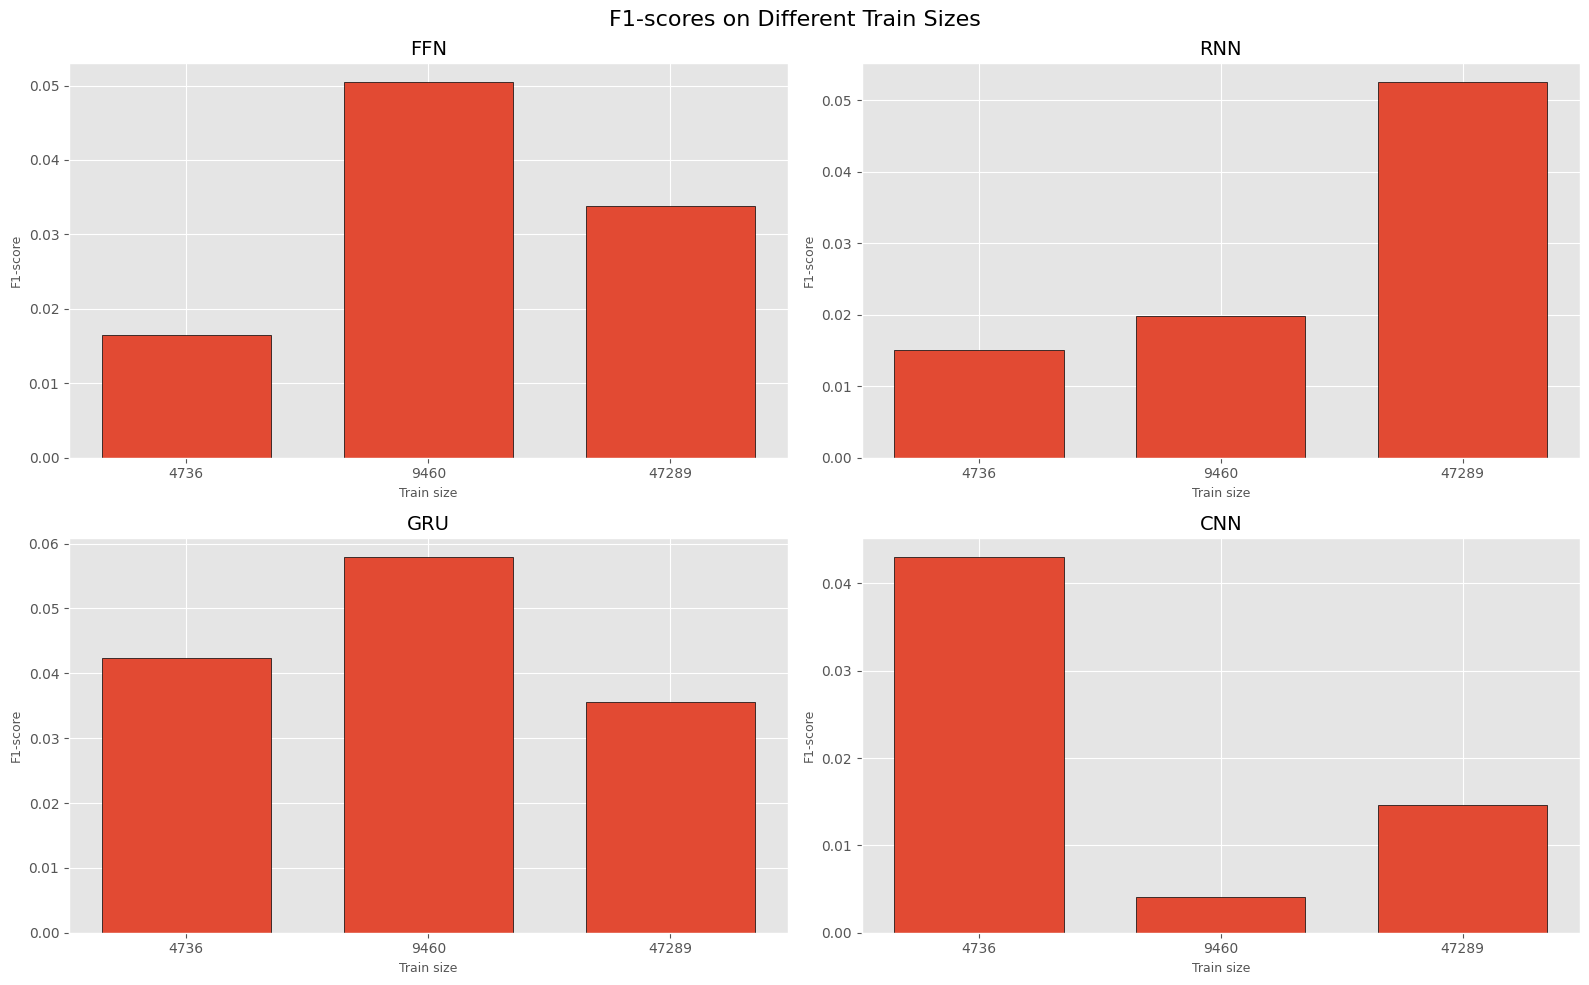

In [95]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

fig.suptitle("F1-scores on Different Train Sizes", fontsize=16)

for i, (ax, nn) in enumerate(zip(axs.ravel(), ["ffn", "rnn", "gru", "cnn"])):
	nn_dir = os.path.dirname(os.path.abspath((paths[nn])))
	with open(os.path.join(nn_dir, "train_sizes", "scores.json")) as f:
		train_sizes = json.load(f)
	train_sizes = sorted(train_sizes, key=lambda x: x["train_size"])
	sizes = [str(entry["train_size"]) for entry in train_sizes]
	f1s = [entry["f1"] for entry in train_sizes]
	ax.bar(sizes, f1s, width=0.7, edgecolor="black")
	ax.set_xlabel("Train size", fontsize=9)
	ax.set_ylabel("F1-score", fontsize=9)
	ax.set_xticks(sizes)
	caption = nn.upper()
	ax.set_title(caption, fontsize=14)

# adjust layout so titles do not overlap
plt.tight_layout()
# plt.subplots_adjust(hspace=-0.06)

plt.savefig(os.path.join(figures_dir, "f1_vs_train_size.png"), dpi=1200)
plt.show()

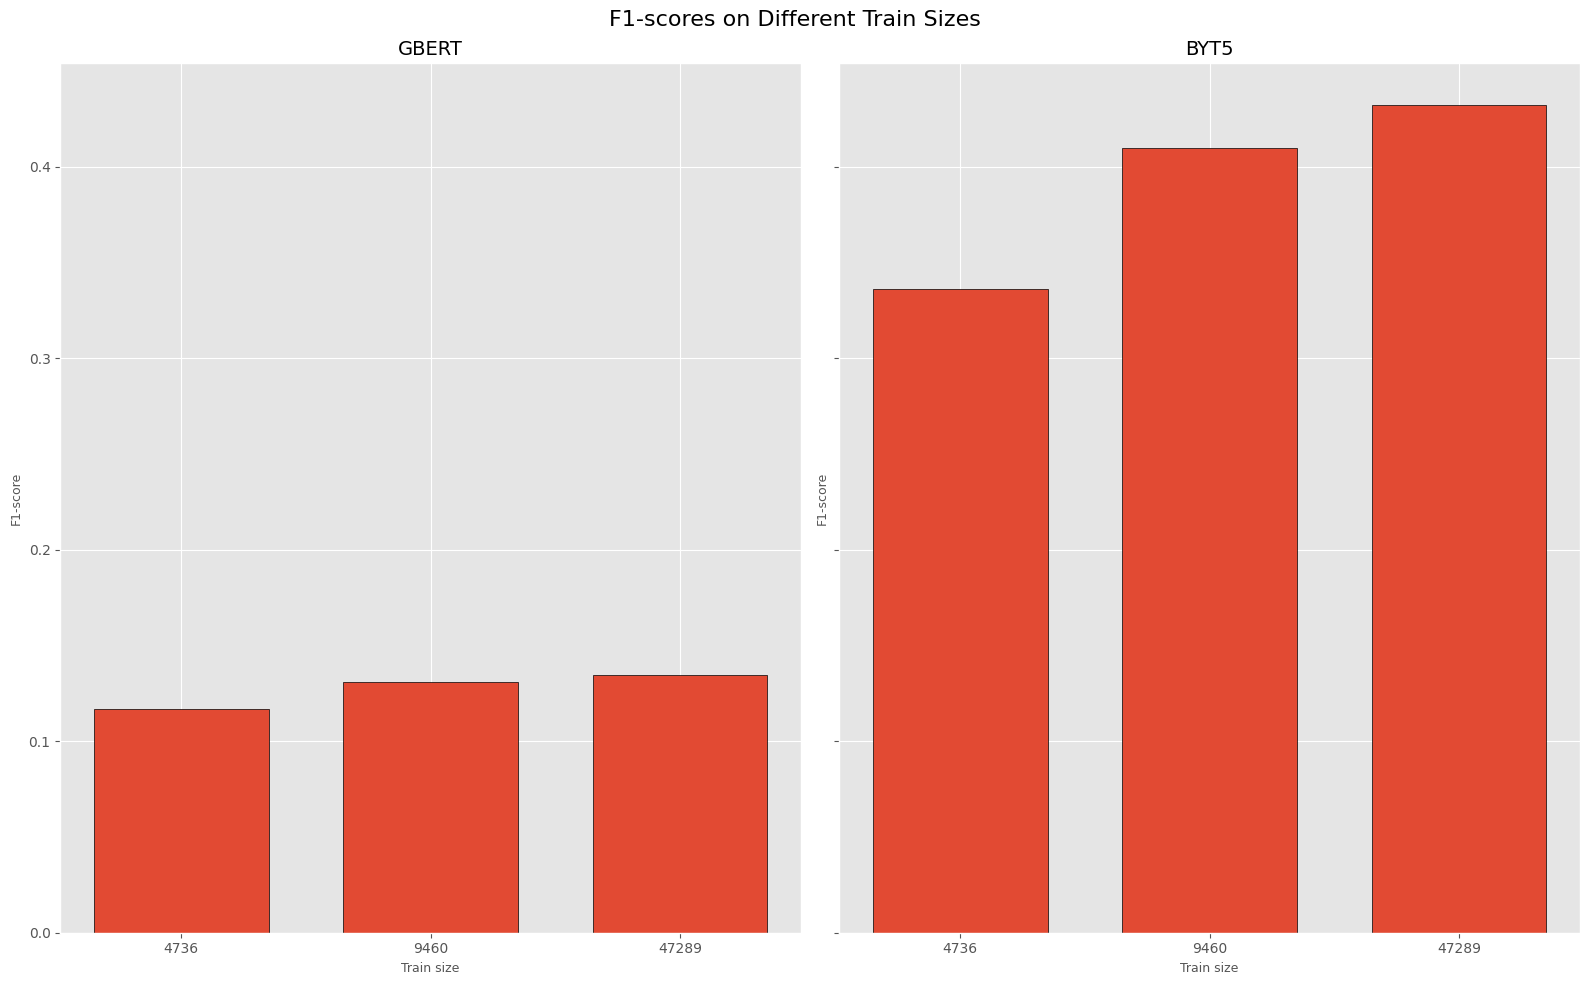

In [139]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

fig.suptitle("F1-scores on Different Train Sizes", fontsize=16)

for i, (ax, llm) in enumerate(zip(axs.ravel(), ["gbert", "byt5"])):
	nn_dir = os.path.dirname(os.path.abspath((paths[llm])))
	with open(os.path.join(nn_dir, "final", "scores.json")) as f:
		train_sizes = json.load(f)
	train_sizes = sorted(train_sizes, key=lambda x: x["train_size"])
	sizes = [str(entry["train_size"]) for entry in train_sizes]
	f1s = [entry["f1"] for entry in train_sizes]
	ax.bar(sizes, f1s, width=0.7, edgecolor="black")
	ax.set_xlabel("Train size", fontsize=9)
	ax.set_ylabel("F1-score", fontsize=9)
	ax.set_xticks(sizes)
	caption = llm.upper()
	ax.set_title(caption, fontsize=14)

# adjust layout so titles do not overlap
plt.tight_layout()
# plt.subplots_adjust(hspace=-0.06)

plt.savefig(os.path.join(figures_dir, "f1_vs_train_size_llms.png"), dpi=1200)
plt.show()